<span style="font-size:20px; color:blue"> ARBOL DE DECISION</span>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [9]:
# lectura de datos 

Datos = pd.read_csv(r'C:\Users\carli\OneDrive\Escritorio\winequality_red.csv')

In [19]:
from IPython.display import display

# Mostrar el DataFrame completo
display(Datos)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [21]:
# Descripción de los datos
Datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<span style="font-size:20px; color:blue">1) ANALISIS EXPLORATORIO </span>

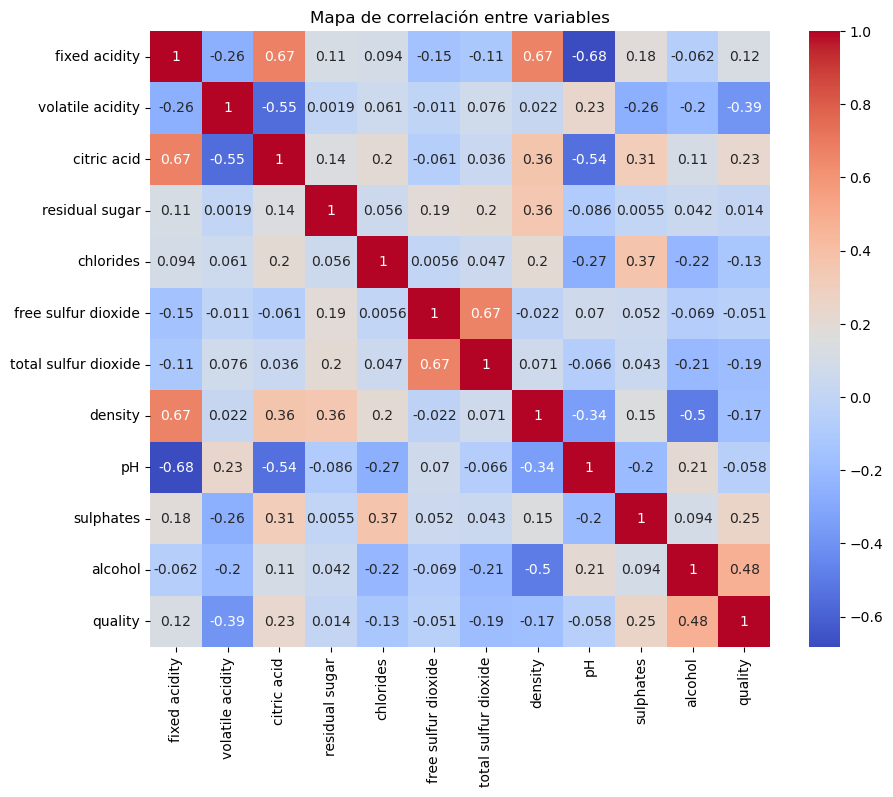

In [23]:
# Generar un mapa de calor para visualizar la correlación entre las variables
plt.figure(figsize=(10,8))
sns.heatmap(Datos.corr(), annot=True, cmap='coolwarm')  # Mapa de calor con anotaciones
plt.title('Mapa de correlación entre variables')
plt.show()

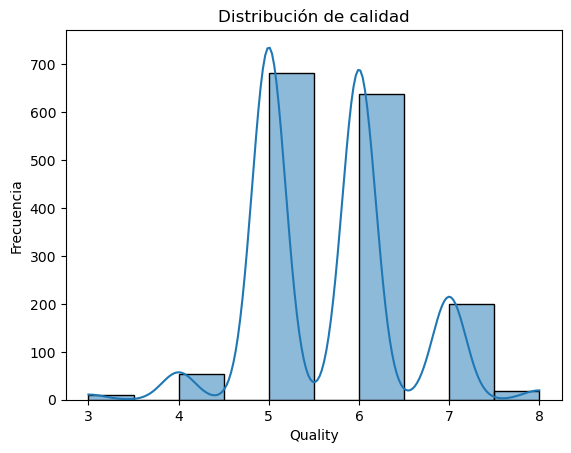

In [25]:
# Ver la distribución de la variable objetivo (quality) para entender la calidad del vino en el dataset
sns.histplot(Datos['quality'], kde=True, bins=10)  # Histograma de la calidad del vino
plt.title('Distribución de calidad')
plt.xlabel('Quality')
plt.ylabel('Frecuencia')
plt.show()

<span style="font-size:20px; color:blue">2) LIMPIEZA DE LOS DATOS </span>

In [27]:
# Paso 3: Preprocesamiento de datos
# Convertir `quality` en una variable binaria (0 o 1) para simplificar el modelo
# Aquí consideramos que calidad > 5 es "buena calidad" (1), y <= 5 es "baja calidad" (0)
Datos['quality'] = Datos['quality'].apply(lambda x: 1 if x > 5 else 0)


In [29]:
# Revisar si hay valores faltantes en las columnas y tratarlos si es necesario
print("Valores nulos en cada columna:")
print(Datos.isnull().sum())  # Conteo de valores nulos en cada columna

Valores nulos en cada columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [31]:
# Reemplazar valores nulos con la mediana de cada columna usando SimpleImputer
imputer = SimpleImputer(strategy='median')
Datos_imputados = pd.DataFrame(imputer.fit_transform(Datos), columns=Datos.columns)  # Crea un nuevo DataFrame con los valores imputados


In [33]:
# Verificar si existen valores nulos después de la imputación
print("Valores nulos después de la imputación:")
print(Datos_imputados.isnull().sum())

Valores nulos después de la imputación:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<span style="font-size:20px; color:blue">3) SELECCION DE LAS CARACTERISTICAS </span>

In [35]:
# Paso 4: Selección de características
# Separar las características (X) y la variable objetivo (y)
X = Datos_imputados.drop('quality', axis=1)  # Elimina la columna 'quality' de las características
y = Datos_imputados['quality']  # 'quality' es la variable objetivo

In [37]:
# Usar SelectKBest para seleccionar las 5 mejores características en función de ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=5)  # Selección de características usando F-value ANOVA
X_selected = selector.fit_transform(X, y)  # Ajustar y transformar los datos para seleccionar características


In [39]:
# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()]  # Filtra las columnas seleccionadas
print("Características seleccionadas:", selected_features)  # Imprime las características seleccionadas


Características seleccionadas: Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')


<span style="font-size:20px; color:blue">4) DIVISION DEL DATASET EN TRAIN Y TEST</span>

In [41]:
# Paso 5: Dividir el dataset en conjuntos de entrenamiento y prueba
# Dividir los datos en un 75% para entrenamiento y 25% para prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, stratify=y, random_state=0)


<span style="font-size:20px; color:blue">5) ENTRENAMIENTO DEL MODELO</span>

In [43]:
# Paso 6: Entrenar el modelo de Árbol de Decisión
# Crear un clasificador de árbol de decisión con los parámetros predeterminados
tree_model = DecisionTreeClassifier(random_state=0)  # Iniciar el clasificador de árbol de decisión
tree_model.fit(X_train, y_train)  # Entrenar el modelo con los datos de entrenamiento


DecisionTreeClassifier(random_state=0)

<span style="font-size:20px; color:blue">7) EVALUACION Y GRAFICAS</span>

In [45]:
# Paso 7: Evaluar el modelo
# Realizar predicciones en el conjunto de prueba
y_pred = tree_model.predict(X_test)  # Generar predicciones con el modelo


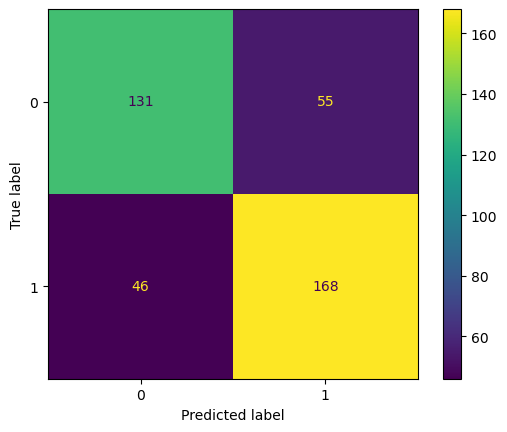

In [47]:
# Matriz de confusión para visualizar los resultados de las predicciones
cm = confusion_matrix(y_test, y_pred)  # Calcular la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  # Crear un objeto para visualizar la matriz de confusión
disp.plot()  # Mostrar la matriz de confusión
plt.show()

In [49]:
# Reporte de clasificación que incluye métricas de precisión, recall, F1-score, etc.
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))  # Imprimir las métricas de evaluación del modelo


Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72       186
         1.0       0.75      0.79      0.77       214

    accuracy                           0.75       400
   macro avg       0.75      0.74      0.75       400
weighted avg       0.75      0.75      0.75       400



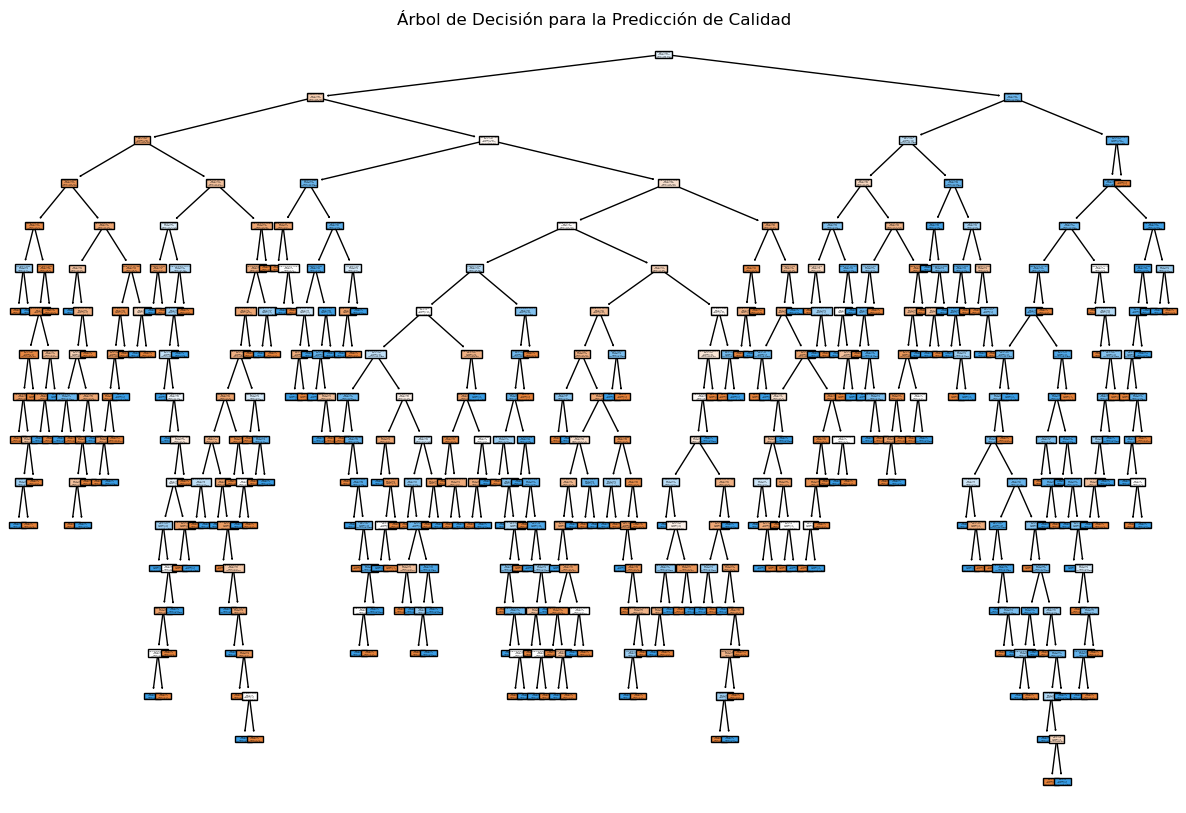

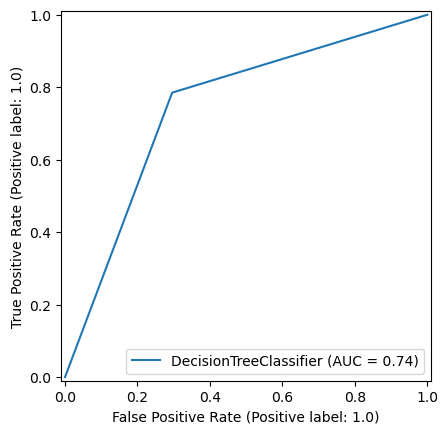

In [51]:
# Paso 8: Visualización del árbol de decisión y la curva ROC
# Visualización del árbol de decisión para interpretar cómo toma decisiones el modelo
plt.figure(figsize=(15,10))  # Tamaño de la gráfica del árbol de decisión
plot_tree(tree_model, feature_names=selected_features, class_names=['Baja Calidad', 'Buena Calidad'], filled=True)
plt.title("Árbol de Decisión para la Predicción de Calidad")
plt.show()

# Curva ROC para visualizar la capacidad del modelo para discriminar entre clases
RocCurveDisplay.from_estimator(tree_model, X_test, y_test)
plt.show()

<span style="font-size:20px; color:blue">INTERPRETACIÓN ANEXO EN EL DUCUMENTO PDF</span>
